In [4]:
import pandas as pd
import numpy as np

import scipy
import math
import time

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore')

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import make_scorer, confusion_matrix, classification_report,\
                            roc_curve, roc_auc_score, average_precision_score
from sklearn import svm
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.initializers import Constant

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall, AUC
#importing important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
!pip install imbalanced-learn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

###EDA

In [5]:
# importing dataset
Trainingdatapath="/content/drive/My Drive/Personal/Work/Online/Jupyter/Git/Unitytest/training_data.csv"
df = pd.read_csv(Trainingdatapath, sep=';', delimiter=';' )
columnnames=df.columns
#count how many NAs in each column
for x in columnnames:  
  print(x)
  nas=df[x].isna().sum()
  percentage= nas/len(df[x])
  print(percentage*100)
#how many different campaignId do i have
#how many different platforms 
#how many different countries
#how many different connectionTypes
#how many different deviceType 
#how many installs we have
print(df['campaignId'].nunique())
print(df['softwareVersion'].nunique())
print(df['sourceGameId'].nunique())
columnsinquestion= ['platform','country','connectionType','deviceType','install']
for x in range(len(columnsinquestion)):  
  print('unique values ',df[columnsinquestion[x]].nunique())
  print(df[columnsinquestion[x]].value_counts().head(3))
df=df.drop(['id', 'campaignId','sourceGameId'], axis=1)
# drop na rows
df=df.dropna()
print(len(df))
tmp=df

id
0.0
timestamp
0.0
campaignId
0.0
platform
0.0
softwareVersion
0.0
sourceGameId
0.0
country
0.004576368719387039
startCount
0.0
viewCount
0.0
clickCount
0.0
installCount
0.0
lastStart
7.393780669599772
startCount1d
0.0
startCount7d
0.0
connectionType
0.0
deviceType
0.0
install
0.0
5704
174
29969
unique values  2
android    1591868
ios         615122
Name: platform, dtype: int64
unique values  220
US    359949
RU    180313
IN    168644
Name: country, dtype: int64
unique values  3
wifi        1497765
cellular     691342
none          17883
Name: connectionType, dtype: int64
unique values  23637
iPhone8,1    58565
iPhone7,2    51680
iPhone9,3    46460
Name: deviceType, dtype: int64
unique values  2
0    2180493
1      26497
Name: install, dtype: int64
2043723


In [6]:
df.describe()

,startCount,viewCount,clickCount,installCount,startCount1d,startCount7d,install
count,2.043723e+06,2.043723e+06,2.043723e+06,2.043723e+06,2.043723e+06,2.043723e+06,2.043723e+06
mean,5.209208e+01,3.883096e+01,2.267104e+00,6.121544e-01,7.249891e+00,2.128521e+01,1.158425e-02
std,9.290212e+01,8.140576e+01,7.036321e+00,1.595611e+00,1.168352e+01,3.562396e+01,1.070050e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
50%,2.200000e+01,1.200000e+01,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+01,0.000000e+00
75%,5.800000e+01,3.800000e+01,2.000000e+00,1.000000e+00,8.000000e+00,2.500000e+01,0.000000e+00
max,3.997000e+03,2.886000e+03,1.031000e+03,7.300000e+01,1.466000e+03,3.280000e+03,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043723 entries, 0 to 2206989
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   timestamp        object
 1   platform         object
 2   softwareVersion  object
 3   country          object
 4   startCount       int64 
 5   viewCount        int64 
 6   clickCount       int64 
 7   installCount     int64 
 8   lastStart        object
 9   startCount1d     int64 
 10  startCount7d     int64 
 11  connectionType   object
 12  deviceType       object
 13  install          int64 
dtypes: int64(7), object(7)
memory usage: 233.9+ MB


In [8]:
df.groupby('connectionType')['install'].sum()

connectionType
cellular     7665
none           96
wifi        15914
Name: install, dtype: int64

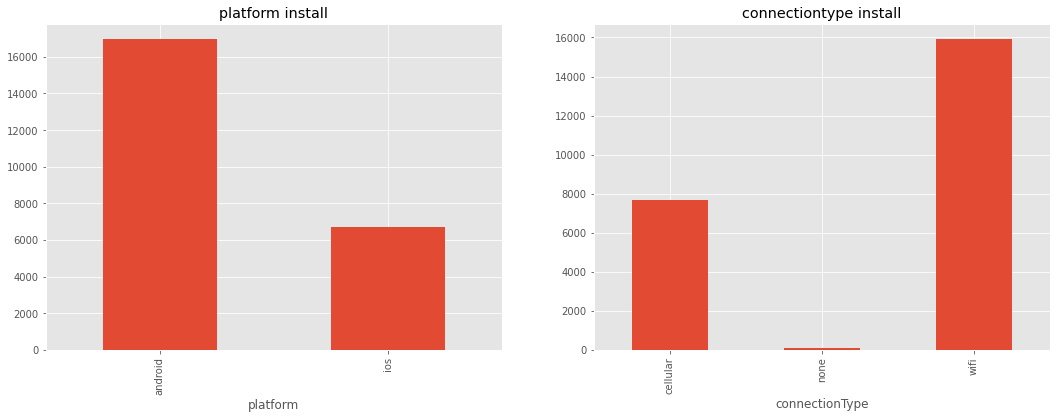

In [9]:
from matplotlib import rcParams
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
df.groupby('platform')['install'].sum().plot(kind='bar', ax=axes[0], title='platform install')
df.groupby('connectionType')['install'].sum().plot(kind='bar', ax=axes[1], title='connectiontype install')
plt.show()

In [10]:
# train encoonderr decoder function  after that  clustering alorithms  
# check if training and data belong to the same porpbability distribution
# what tis the acceptable threshold maybe 80-85%

In [11]:
1#drop na rows and see if the number of installs becomes very low 
1# id will be dropped
1# timestamp will become seconds of the day
1# compaignid there has 5000 unique and i think it will just noise up the prediction so i'll drop it
1# ill keep platform and i'll one-hot encode it
1# softwareVersion has 174 so ill Label Encoding it
1# sourceGameId has 29969 and since its not related to marketing bid i will drop it 
1# i'll keep country,viewcount,clickcount,installcount as they might help define the user base
1# startCount1d, startCount7d i will keep as is 
1# connectionType ill onehot encode it and devicetype i will encode
1# i have way more (100X) non installs than installs which makes this an unbalance dataset so i will use undersampling and oversampling maybe later i will try Ensemble different resampled datasets
# what does connection type "none" mean?
1# i'm going to need to change timestamp into seconds of the day . my assumption is that the date it's self is not useful 
# lastStart i will convert to seconds since last started event
# MAYBE i'm going to drop software version because i don't think it will have an affect on installation 
1# i have to change the categorical data to numerical variables 
# i will also try T-SNE to see if i can segrgate the data 
# going to try ploting over time , to see maybe its the time of day that best clasifies install

1

In [12]:
def labelenconder(df,string):
  # define label encoder 
  label_encoder = preprocessing.LabelEncoder()
  df[string]= label_encoder.fit_transform(df[string])
def onehotencoder(df,columnname):
  le = LabelEncoder()
  #New variable for outlet
  df[columnname] = le.fit_transform(df[columnname])
  #Hot encoding 
  df = pd.get_dummies(df, columns=[columnname])
  df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
  return df

In [13]:
df=onehotencoder(df,'platform')#Hot encoding : 0 andriod 1 ios
df=onehotencoder(df,'connectionType')#Hot encoding : 0=cellular , 1=none, and if 0 in both means wifi 
labelenconder(df,'country')
labelenconder(df,'softwareVersion')
labelenconder(df,'deviceType')

In [14]:
def timestamp(time):
    T = time
    t = T.split('T')
    date=t[0].split('-')
    d=int(date[2])
    m=int(date[1])*4*7
    y=int(date[0])*52*7
    #today's date
    cd=13
    cm=9*4*7
    cy=2020*52*7
    #assuming each month has 4 weeks and there are 52 weeks in a year so each year is 364days
    difference=(cy+cm+cd)-(y+m+d)
    diff_in_seconds=difference
    t = T.split('T')
    t2 = t[1].split(':')
    s = t2[2].split('.')
    e = s[1].split('+')
    hours = int(t2[0])
    minutes = int(t2[1])
    seconds = int(s[0])
    etc = float('.' + e[0])
    timestamp = (hours * 3600) + (minutes * 60) + (seconds + etc)
    return timestamp,diff_in_seconds

In [15]:
df['lastStart'] = df['lastStart'].apply(lambda x: timestamp(x)[1])# days since last played

In [16]:
df['timestamp'] = df['timestamp'].apply(lambda x: timestamp(x)[0])

###Rebalancing

In [ ]:
#undersampling
X_train,X_test = train_test_split(df,test_size=0.2,random_state=10)
# G is the ratio of good:bad transactions to be left in the training set. 
G = 40
X_train= pd.concat([X_train[X_train.install==1],
                    X_train[X_train.install==0].sample(G*sum(X_train.install), random_state=10)
                    ], axis=0)
print('Subsampled train shape: ', X_train.shape)
print(X_train.install.value_counts())
print(f'{X_train.install.mean():.6f}  {1/X_train.install.mean():.1f}')
print("Before undersampling :" , Counter(df.install))

In [ ]:
#combining datasets
orginaldf = pd.concat([X_train, X_test], axis=0, copy=True)
df_xfeatures=orginaldf.drop('install', axis=1)
df_y=orginaldf['install']
# normalization for a the columns Countosh shrinking , because some values are very large and some are very small
scaler =MinMaxScaler(feature_range=(0,1))
scaledfeatures = pd.DataFrame(scaler.fit_transform(df_xfeatures.values), columns=df_xfeatures.columns, index=df_xfeatures.index)
X_train,X_test, y_train,y_test = train_test_split(scaledfeatures,df_y,test_size=0.2,random_state=10)
#oversampling
smote = SMOTE(sampling_strategy="auto")
X_train_smote, y_train_smote = smote.fit_sample(scaledfeatures,df_y)
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

###viz


In [ ]:
# lets vizualize the features over the time frame 
# Scale time from seconds to days: time->time/86400
def plot_feature(f):
    _, (ax0,ax1) = plt.subplots(1, 2, figsize=(12, 4))
    sns.distplot(df[f], ax=ax0)
    ax0.set_title(f)
    sns.violinplot(f,'install',data=df, orient='h', ax=ax1)
    ax1.set_title(f'{f} by install  (0:notInstall, 1:Install)')
    plt.show()

for f in df.columns:
  plot_feature(f)

In [ ]:
def plot_tsne(X_emb, Y):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_emb[np.where(Y==0), 0], X_emb[np.where(Y==0), 1], marker='.', color='g', alpha=1, label='Non install')
    plt.scatter(X_emb[np.where(Y==1), 0], X_emb[np.where(Y==1), 1], marker='o', color='r', alpha=0.5, label='install')
    plt.title('t-SNE embedding')
    plt.legend(loc='best')
    plt.show()

In [ ]:
# stopping this because it is taking too long 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10)
#X_emb = tsne.fit_transform(X_train)
#plot_tsne(X_emb, y_train)#y_train only has the classification column

###Autoencoder

In [18]:
# normalization for a the columns Countosh shrinking , because some values are very large and some are very small
scaler =MinMaxScaler(feature_range=(0,1))
df_xfeatures=df.drop('install',axis=1)
df_y=df['install']
scaledfeatures = pd.DataFrame(scaler.fit_transform(df_xfeatures.values), columns=df_xfeatures.columns, index=df_xfeatures.index)
X_train,X_test, y_train,y_test = train_test_split(scaledfeatures,df_y,test_size=0.2,random_state=10)

In [19]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF) - \
                   np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    
    print('Mean for anomaly scores: ', np.mean(loss))
    
    return loss

In [20]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.losses import BinaryCrossentropy

In [21]:
# Call neural network API
model = Sequential()

# Apply relu activation function to input layer
# Generate hidden layer with 14 nodes, the same as the input layer
model.add(Dense(units=14, activation='relu',input_dim=14))
model.add(Dense(units=14, activation='relu'))
# Apply relu activation function to hidden layer
# Generate output layer with 14 nodes
model.add(Dense(units=14, activation='relu'))

In [22]:
model.compile(optimizer='adam',loss=BinaryCrossentropy(),metrics=['accuracy'])

In [24]:
# Train the model
num_epochs = 10
batch_size = 256

history = model.fit(x=X_train, y=X_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test,y_test),
                    verbose=1)

Epoch 1/10
6387/6387 [==============================] - 15s 2ms/step - loss: 0.5611 - accuracy: 0.8725 - val_loss: 1.2008 - val_accuracy: 0.0405
Epoch 2/10
6387/6387 [==============================] - 15s 2ms/step - loss: 0.5398 - accuracy: 0.9290 - val_loss: 1.2129 - val_accuracy: 0.0417
Epoch 3/10
6387/6387 [==============================] - 15s 2ms/step - loss: 0.5416 - accuracy: 0.9321 - val_loss: 1.2142 - val_accuracy: 0.0419
Epoch 4/10
6387/6387 [==============================] - 15s 2ms/step - loss: 0.5385 - accuracy: 0.9332 - val_loss: 1.2076 - val_accuracy: 0.0424
Epoch 5/10
6387/6387 [==============================] - 15s 2ms/step - loss: 0.5376 - accuracy: 0.9329 - val_loss: 1.2043 - val_accuracy: 0.0423
Epoch 6/10
6387/6387 [==============================] - 15s 2ms/step - loss: 0.5368 - accuracy: 0.9333 - val_loss: 1.2041 - val_accuracy: 0.0426
Epoch 7/10
6387/6387 [==============================] - 15s 2ms/step - loss: 0.5369 - accuracy: 0.9334 - val_loss: 1.2045 - val_ac

In [25]:
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'], \
                               preds['anomalyScore'])
    average_precision = average_precision_score( \
                        preds['trueLabel'], preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
        {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the \
        curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds, average_precision

In [26]:
# Evaluate on test set
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)

12774/12774 [==============================] - 10s 800us/step
Mean for anomaly scores:  0.1522137284619918


530542     0
1034025    0
1674193    0
398499     0
2062538    0
          ..
1556311    0
639958     0
382117     0
757431     0
1136104    0
Name: install, Length: 408745, dtype: int64

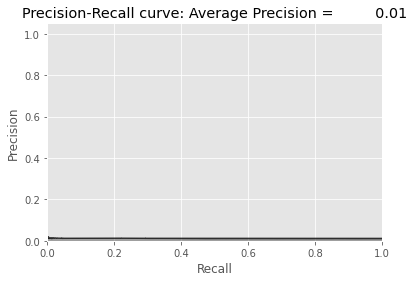

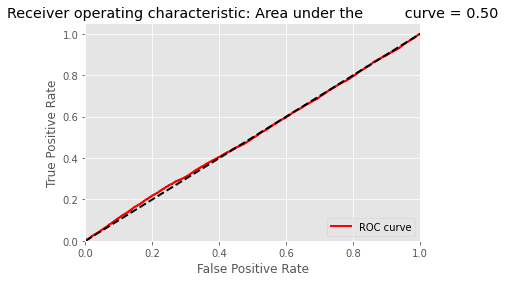

0.011949269221322396

In [33]:
preds = plotResults(y_test, anomalyScoresAE, True)
preds[1]

In [35]:
dataX=X_train
testDataX=X_test
testDataY=y_test
y_train

2150014    0
939231     0
140519     0
189780     0
1438578    0
          ..
1613819    0
2085188    0
1137956    0
1957640    0
1509373    0
Name: install, Length: 1634978, dtype: int64

12774/12774 [==============================] - 10s 783us/step
Mean for anomaly scores:  0.0780936276416424


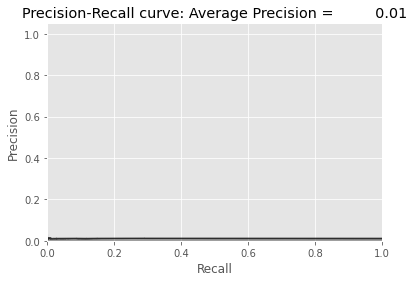

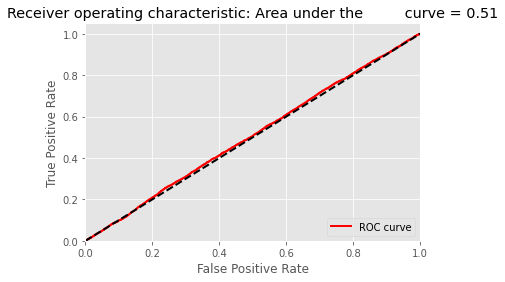

Saving model with best precision:  0.011805481088177125
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./fraud_model/assets
12774/12774 [==============================] - 10s 786us/step
Mean for anomaly scores:  0.2159600601670622


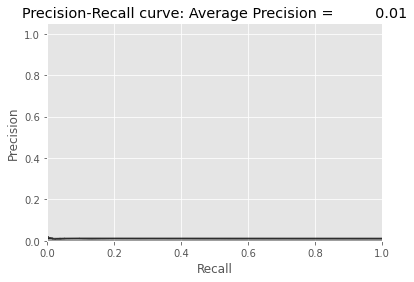

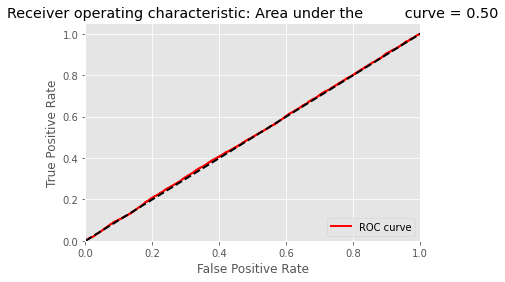

12774/12774 [==============================] - 10s 793us/step
Mean for anomaly scores:  0.07500139830896542


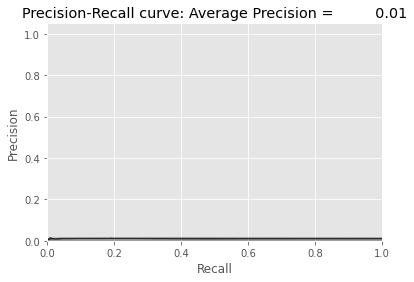

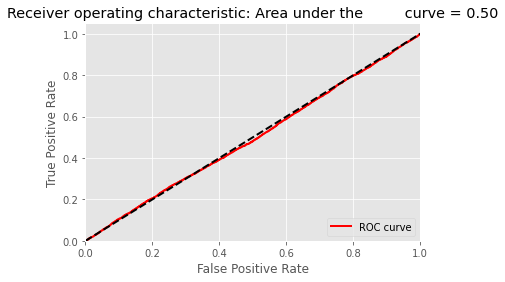

12774/12774 [==============================] - 10s 779us/step
Mean for anomaly scores:  0.0199374758190106


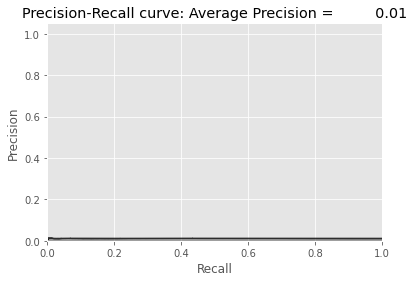

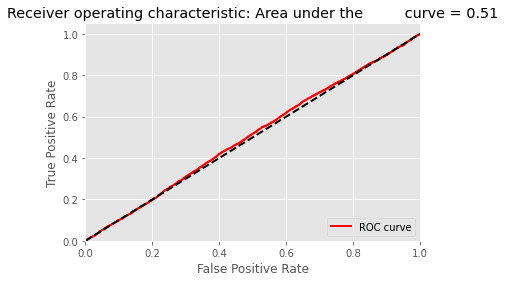

12774/12774 [==============================] - 10s 777us/step
Mean for anomaly scores:  0.03261909861627687


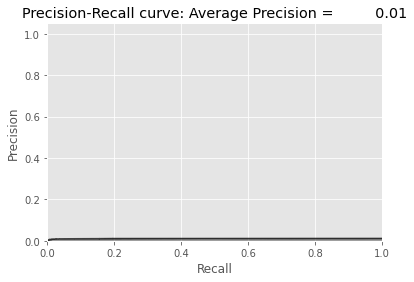

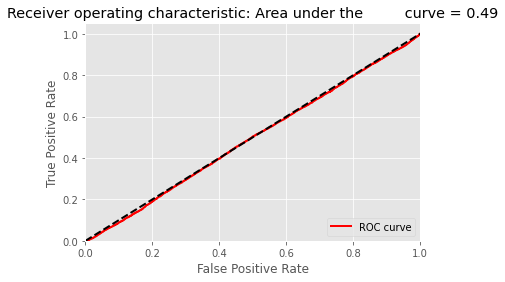

12774/12774 [==============================] - 10s 781us/step
Mean for anomaly scores:  0.008463543672338163


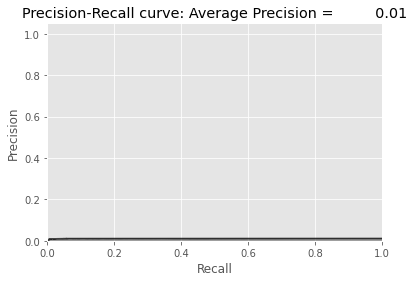

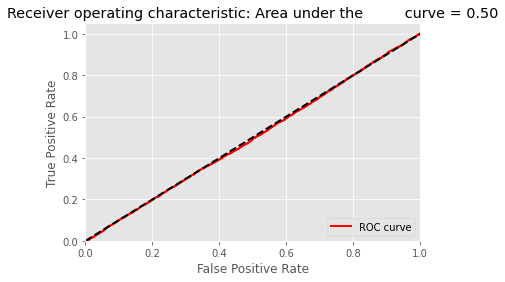

12774/12774 [==============================] - 10s 812us/step
Mean for anomaly scores:  0.08275193937058141


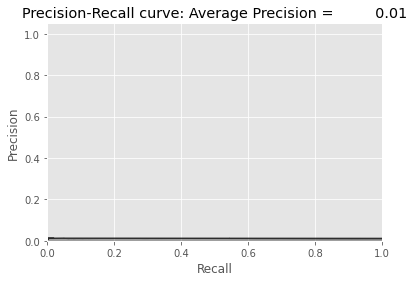

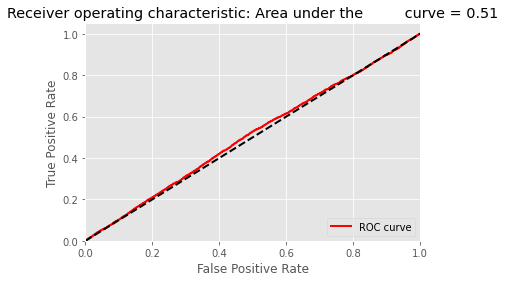

Saving model with best precision:  0.011973898339129329
INFO:tensorflow:Assets written to: ./fraud_model/assets
12774/12774 [==============================] - 10s 797us/step
Mean for anomaly scores:  0.0899292762304349


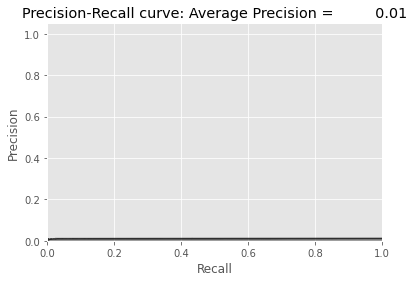

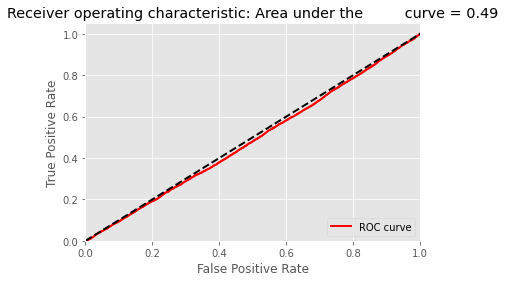

12774/12774 [==============================] - 10s 784us/step
Mean for anomaly scores:  0.07665379492124466


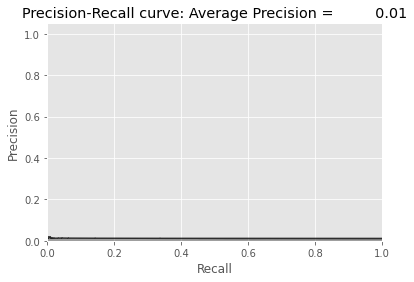

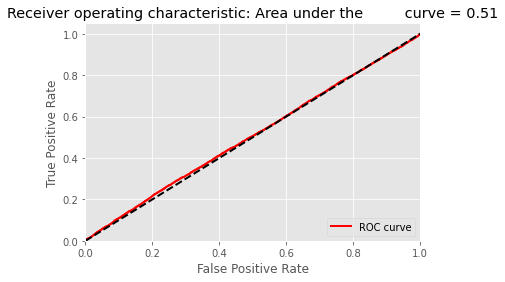

Saving model with best precision:  0.012048835563991524
INFO:tensorflow:Assets written to: ./fraud_model/assets
12774/12774 [==============================] - 10s 800us/step
Mean for anomaly scores:  0.1904229836295524


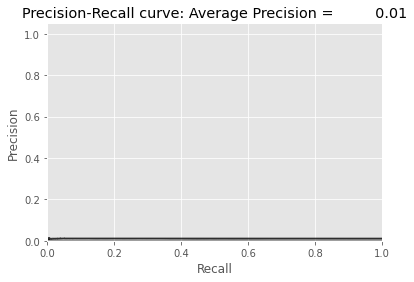

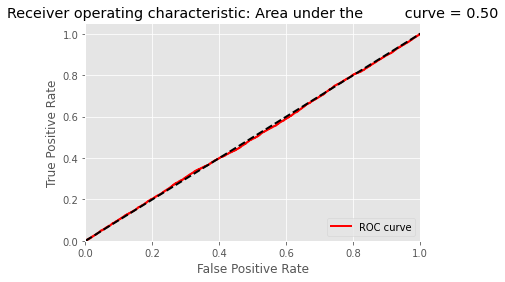

Mean average precision over 10 runs:  0.011621719607383162
Coefficient of variation over 10 runs:  0.025471742589654373


[0.011805481088177125,
 0.011748844865600253,
 0.011550259523384428,
 0.011790409785473665,
 0.011172128601233983,
 0.011374603187059231,
 0.011973898339129329,
 0.011149688395222184,
 0.012048835563991524,
 0.011603046724559887]

In [36]:
# 10 runs - We will capture mean of average precision
test_scores = []
best_precision = 0
for i in range(0,10):
    # Call neural network API
    model = Sequential()
    # Apply linear activation function to input layer
    # Generate hidden layer with 14 nodes, the same as the input layer
    model.add(Dense(units=14, activation='linear',input_dim=14))
    model.add(Dense(units=14, activation='linear'))

    # Apply linear activation function to hidden layer
    # Generate output layer with 14 nodes
    model.add(Dense(units=14, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])
      # Train the model
    num_epochs = 10
    batch_size = 256

    history = model.fit(x=dataX, y=dataX,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(dataX, dataX),
                        verbose=0)

    # Evaluate on test set
    predictions = model.predict(testDataX, verbose=1)
    anomalyScoresAE = anomalyScores(testDataX, predictions)
    preds, avgPrecision = plotResults(testDataY, anomalyScoresAE, True)
    test_scores.append(avgPrecision)
    
    if avgPrecision > best_precision:
        best_precision = avgPrecision
        print("Saving model with best precision: ", best_precision)
        tf.saved_model.save(model, "./fraud_model/")

# Results
print("Mean average precision over 10 runs: ", np.mean(test_scores))
print("Coefficient of variation over 10 runs: ", np.std(test_scores)/ \
                                                np.mean(test_scores))
test_scores